In [11]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf


from sklearn.metrics import confusion_matrix, classification_report


In [12]:
data = pd.read_csv('dataset/fraud_dataset.csv')

In [13]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [16]:
{column: len(data[column].unique()) for column in data.columns}

{'step': 743,
 'type': 5,
 'amount': 5316900,
 'nameOrig': 6353307,
 'oldbalanceOrg': 1845844,
 'newbalanceOrig': 2682586,
 'nameDest': 2722362,
 'oldbalanceDest': 3614697,
 'newbalanceDest': 3555499,
 'isFraud': 2,
 'isFlaggedFraud': 2}

In [17]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [18]:
pd.get_dummies(data['type'], prefix='tp')

,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
6362615,False,True,False,False,False
6362616,False,False,False,False,True
6362617,False,True,False,False,False
6362618,False,False,False,False,True


In [19]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [20]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [21]:
def preprocess_inputs(df):
    df = df.copy()


    # Drop step, nameOrig, and isFlaggedFraud columns
    df = df.drop(['step', 'nameOrig', 'isFlaggedFraud'], axis=1)


    # One-hot encode the type column
    df = onehot_encode(df, column='type', prefix='tp')

    y = df['isFraud'].copy()
    X = df.drop('isFraud', axis=1).copy()


    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)


    # Create a tokenizer and fit it to the customer data
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(X_train['nameDest'])

    print("Total # of customers:", len(tokenizer.word_index))


    # Create tokenized customer lists
    customers_train = tokenizer.texts_to_sequences(X_train['nameDest'])
    customers_test = tokenizer.texts_to_sequences(X_test['nameDest'])


    # Pad sequences
    customers_train = tf.keras.preprocessing.sequence.pad_sequences(customers_train, maxlen=1)
    customers_test = tf.keras.preprocessing.sequence.pad_sequences(customers_test, maxlen=1)


    # Drop nameDest column
    X_train = X_train.drop('nameDest', axis=1)
    X_test = X_test.drop('nameDest', axis=1)


    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


    return X_train, X_test, customers_train, customers_test, y_train, y_test

In [22]:
X_train, X_test, customers_train, customers_test, y_train, y_test = preprocess_inputs(data)

Total # of customers: 2034516


In [23]:
customers_train

array([[ 402536],
       [ 179952],
       [  50697],
       ...,
       [ 105146],
       [ 213455],
       [2034516]])

In [24]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,-0.287700,-0.288616,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,1.399136,-0.302287
1,-0.225499,3.355304,3.321674,-0.297980,-0.320792,1.882930,-0.736416,-0.081113,-0.714727,-0.302287
2,-0.114208,-0.282724,-0.292351,-0.057256,-0.056708,-0.531087,1.357927,-0.081113,-0.714727,-0.302287
3,0.142207,-0.283408,-0.196235,-0.323090,-0.332387,1.882930,-0.736416,-0.081113,-0.714727,-0.302287
4,-0.024871,-0.203376,-0.264435,-0.202709,-0.176426,-0.531087,1.357927,-0.081113,-0.714727,-0.302287
...,...,...,...,...,...,...,...,...,...,...
4453829,-0.252322,-0.283597,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,1.399136,-0.302287
4453830,-0.237533,0.773386,0.768804,1.462807,1.308741,1.882930,-0.736416,-0.081113,-0.714727,-0.302287
4453831,-0.183169,-0.288616,-0.292351,0.813453,0.736746,-0.531087,1.357927,-0.081113,-0.714727,-0.302287
4453832,-0.073515,-0.277951,-0.292351,-0.323090,-0.277023,-0.531087,1.357927,-0.081113,-0.714727,-0.302287


In [25]:
y_train

4878474    0
3860469    0
1875100    0
2452949    0
5530032    0
          ..
1241052    0
3163458    0
4222334    0
277869     0
4967934    0
Name: isFraud, Length: 4453834, dtype: int64

In [26]:
train_df = pd.concat([X_train, pd.Series(np.squeeze(customers_train), name='customer'), y_train.reset_index(drop=True)], axis=1)

In [27]:
train_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
0,-0.287700,-0.288616,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,1.399136,-0.302287,402536,0
1,-0.225499,3.355304,3.321674,-0.297980,-0.320792,1.882930,-0.736416,-0.081113,-0.714727,-0.302287,179952,0
2,-0.114208,-0.282724,-0.292351,-0.057256,-0.056708,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,50697,0
3,0.142207,-0.283408,-0.196235,-0.323090,-0.332387,1.882930,-0.736416,-0.081113,-0.714727,-0.302287,151428,0
4,-0.024871,-0.203376,-0.264435,-0.202709,-0.176426,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,215460,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4453829,-0.252322,-0.283597,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,1.399136,-0.302287,2034515,0
4453830,-0.237533,0.773386,0.768804,1.462807,1.308741,1.882930,-0.736416,-0.081113,-0.714727,-0.302287,9651,0
4453831,-0.183169,-0.288616,-0.292351,0.813453,0.736746,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,105146,0
4453832,-0.073515,-0.277951,-0.292351,-0.323090,-0.277023,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,213455,0


In [28]:
train_df['isFraud'].value_counts()

isFraud
0    4448123
1       5711
Name: count, dtype: int64

In [29]:
oversampled_data = train_df.query("isFraud == 1").sample(800000, replace=True, random_state=123)

In [30]:
oversampled_data

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
2752851,1.449590,0.078281,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,-0.714727,3.308118,390345,1
2663024,-0.291527,-0.287687,-0.292351,-0.072509,-0.100039,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,286988,1
1024159,-0.291431,-0.287666,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,-0.714727,3.308118,778436,1
3148158,0.544784,-0.111902,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,-0.714727,3.308118,91470,1
4053893,4.811509,0.784927,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,-0.714727,3.308118,1888134,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4004374,-0.104389,-0.248352,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,-0.714727,3.308118,1870123,1
64140,0.086079,-0.208317,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,-0.714727,3.308118,426085,1
692872,0.178081,-0.188979,-0.292351,-0.323090,-0.332387,-0.531087,-0.736416,-0.081113,-0.714727,3.308118,657049,1
2831073,-0.007838,-0.228058,-0.292351,0.479291,0.456775,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,1572,1


In [31]:
train_df = pd.concat([train_df, oversampled_data], axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [32]:
train_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
0,-0.015458,-0.266726,-0.212492,-0.124874,-0.195411,1.882930,-0.736416,-0.081113,-0.714727,-0.302287,78657,0
1,-0.231633,-0.284532,-0.292351,-0.279801,-0.281771,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,79937,0
2,-0.117051,-0.281521,-0.248199,-0.264678,-0.307888,1.882930,-0.736416,-0.081113,-0.714727,-0.302287,194789,0
3,-0.093488,-0.288616,-0.292351,1.565478,1.446651,-0.531087,-0.736416,-0.081113,-0.714727,3.308118,203930,0
4,2.658127,0.332305,-0.292351,-0.323090,0.154616,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,291776,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5253829,-0.288026,-0.288237,-0.292351,-0.276988,-0.288467,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,857665,0
5253830,-0.119431,-0.288616,-0.292351,-0.099064,-0.096212,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,32911,0
5253831,0.423676,-0.288616,-0.292351,-0.129281,-0.034608,-0.531087,1.357927,-0.081113,-0.714727,-0.302287,78683,0
5253832,-0.030834,-0.252255,-0.201390,-0.259935,-0.317718,1.882930,-0.736416,-0.081113,-0.714727,-0.302287,63278,0


In [33]:
train_df['isFraud'].value_counts()

isFraud
0    4448123
1     805711
Name: count, dtype: int64

In [34]:
customers_train = train_df['customer'].copy()
y_train = train_df['isFraud'].copy()
X_train = train_df.drop(['customer', 'isFraud'], axis=1).copy()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X_input (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 customer_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 X_dense1 (Dense)               (None, 64)           704         ['X_input[0][0]']                
                                                                                                  
 customer_embedding (Embedding)  (None, 1, 64)       130209088   ['customer_input[0][0]']         
                                                                                              

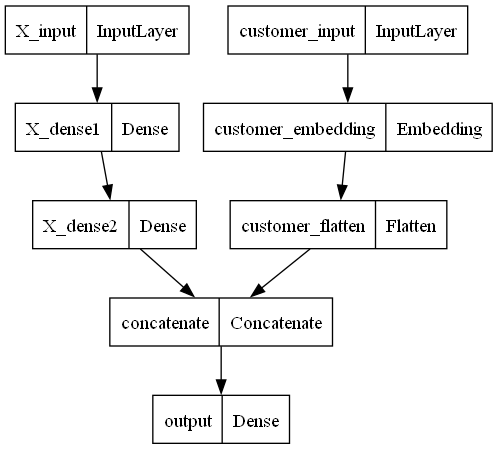

In [35]:
max_index_value = np.max(customers_train)
# Inputs
X_inputs = tf.keras.Input(shape=(10,), name='X_input')
customer_inputs = tf.keras.Input(shape=(1,), name='customer_input')

# X
X_dense1 = tf.keras.layers.Dense(64, activation='relu', name='X_dense1')(X_inputs)
X_dense2 = tf.keras.layers.Dense(64, activation='relu', name='X_dense2')(X_dense1)

# customers
customer_embedding = tf.keras.layers.Embedding(
    input_dim=max_index_value + 1,
    output_dim=64,
    input_length=1,
    name='customer_embedding'
)(customer_inputs)
customer_flatten = tf.keras.layers.Flatten(name='customer_flatten')(customer_embedding)

# Concatenate
concat = tf.keras.layers.concatenate([X_dense2, customer_flatten], name='concatenate')

# Output
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(concat)


model = tf.keras.Model(inputs=[X_inputs, customer_inputs], outputs=outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

In [36]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

In [37]:
history = model.fit(
    [X_train, customers_train],
    y_train,
    validation_split=0.2,
    class_weight={
        0: 0.25,
        1: 4.0
    },
    batch_size=5000,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
841/841 [==============================] - 744s 882ms/step - loss: 0.0650 - accuracy: 0.9184 - auc: 0.9969 - val_loss: 0.0136 - val_accuracy: 0.9977 - val_auc: 0.9999
Epoch 2/10
841/841 [==============================] - 732s 871ms/step - loss: 0.0033 - accuracy: 0.9981 - auc: 0.9999 - val_loss: 0.0080 - val_accuracy: 0.9982 - val_auc: 0.9998
Epoch 3/10
841/841 [==============================] - 730s 868ms/step - loss: 0.0021 - accuracy: 0.9984 - auc: 0.9998 - val_loss: 0.0059 - val_accuracy: 0.9985 - val_auc: 0.9999
Epoch 4/10
841/841 [==============================] - 733s 872ms/step - loss: 0.0015 - accuracy: 0.9987 - auc: 0.9999 - val_loss: 0.0058 - val_accuracy: 0.9986 - val_auc: 0.9998
Epoch 5/10
841/841 [==============================] - 742s 882ms/step - loss: 0.0012 - accuracy: 0.9990 - auc: 0.9999 - val_loss: 0.0043 - val_accuracy: 0.9990 - val_auc: 0.9999
Epoch 6/10
841/841 [==============================] - 741s 881ms/step - loss: 9.9007e-04 - accuracy: 0.9992 - 

In [38]:
results = model.evaluate([X_test, customers_test], y_test, verbose=0)
print("Test Accuracy: {:.3f}%".format(results[1] * 100))
print("     Test AUC: {:.3f}".format(results[2] * 100))

Test Accuracy: 99.883%
     Test AUC: 89.450


In [39]:
y_true = np.array(y_test)

y_pred = np.squeeze(model.predict([X_test, customers_test]))
y_pred = (y_pred >= 0.5).astype(np.int64)


cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=["Not Fraud", "Fraud"])

59650/59650 [==============================] - 80s 1ms/step


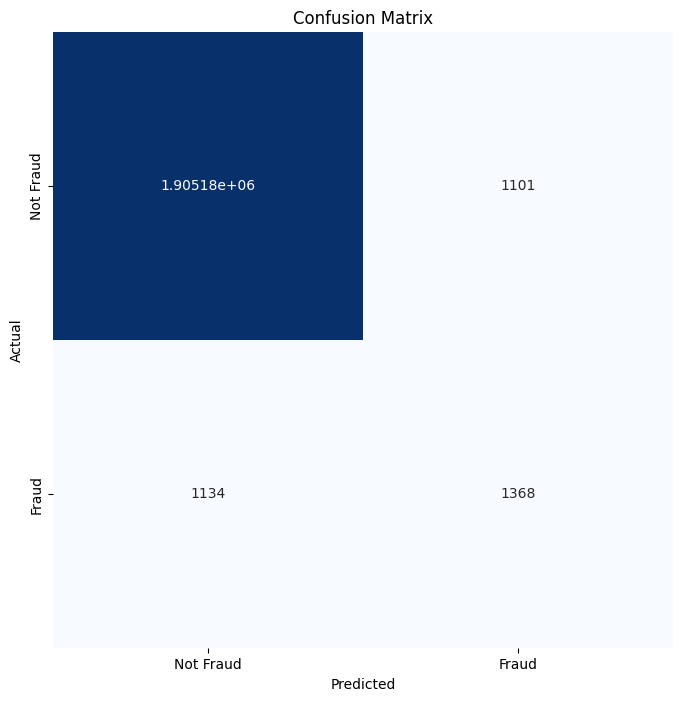

In [40]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(2) + 0.5, ["Not Fraud", "Fraud"])
plt.yticks(np.arange(2) + 0.5, ["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [41]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1906284
       Fraud       0.55      0.55      0.55      2502

    accuracy                           1.00   1908786
   macro avg       0.78      0.77      0.77   1908786
weighted avg       1.00      1.00      1.00   1908786



In [1]:
import joblib
import h5py

In [2]:
joblib.dump(model, "fraud_model.pkl")

NameError: name 'model' is not defined

In [ ]:
model.save("fraud_model.h5")

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
scaler.fit(data)

NameError: name 'data' is not defined